# Integrantes:
- Jorge Eduardo Rodriguez Cardozo - 200711501
- German Augusto Carvajal Murcia -  201313516

# Exercise 03

## Data preparation and model evaluation exercise with credit scoring

Banks play a crucial role in market economies. They decide who can get acces to finance, the terms of the loans, and by doing so, they can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. [Dataset](https://www.kaggle.com/c/GiveMeSomeCredit)

Attribute Information:

|Variable Name	|	Description	|	Type|
|----|----|----|
|SeriousDlqin2yrs	|	Person experienced 90 days past due delinquency or worse 	|	Y/N|
|RevolvingUtilizationOfUnsecuredLines	|	Total balance on credit divided by the sum of credit limits	|	percentage|
|age	|	Age of borrower in years	|	integer|
|NumberOfTime30-59DaysPastDueNotWorse	|	Number of times borrower has been 30-59 days past due |	integer|
|DebtRatio	|	Monthly debt payments	|	percentage|
|MonthlyIncome	|	Monthly income	|	real|
|NumberOfOpenCreditLinesAndLoans	|	Number of Open loans |	integer|
|NumberOfTimes90DaysLate	|	Number of times borrower has been 90 days or more past due.	|	integer|
|NumberRealEstateLoansOrLines	|	Number of mortgage and real estate loans	|	integer|
|NumberOfTime60-89DaysPastDueNotWorse	|	Number of times borrower has been 60-89 days past due |integer|
|NumberOfDependents	|	Number of dependents in family	|	integer|


Read the data into Pandas

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('/Users/germancarvajal/Dropbox/Universidad-201818/Deep_learning_y_redes_neuronales/AppliedDeepLearningClass-master/datasets/KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.io.parsers.read_table(f, sep=',')

data.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
y = data['SeriousDlqin2yrs']
X = data.drop(['SeriousDlqin2yrs','Unnamed: 0'], axis=1)

# Exercise 3.1

Input the missing values of the Age and Number of Dependents 

In [3]:
print(X.isnull().sum())
X.age=X.age.fillna(X.age.mean())
X.NumberOfDependents=X.NumberOfDependents.fillna(X.NumberOfDependents.median())
print(X.isnull().sum())

RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


- The missing values in the age and the number of dependants is imputed with the mean adn the meadian respectevly, according to the variables nature as continious or discrete count numeric vectors.

# Exercise 3.2

From the set of features

Select the features that maximize the **F1Score** the model using K-Fold cross-validation

In [4]:
import random
random.seed(123)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score
reg = LogisticRegression()

Fitting estimator with 10 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 6 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 5 features.


/Users/germancarvajal/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


/Users/germancarvajal/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


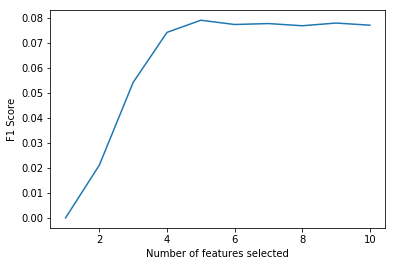

In [5]:
model=RFECV(reg,step=1,cv=2,scoring='f1',n_jobs=-1,verbose=1)
model.fit(X,y)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("F1 Score")
plt.plot(range(1, len(model.grid_scores_) + 1), model.grid_scores_)
plt.show()

In [6]:
pd.DataFrame(X.columns,columns=['Features'])[model.support_]

,Features
2,NumberOfTime30-59DaysPastDueNotWorse
3,DebtRatio
6,NumberOfTimes90DaysLate
7,NumberRealEstateLoansOrLines
8,NumberOfTime60-89DaysPastDueNotWorse


In [7]:
print("Optimal number of features :", model.n_features_)
print("Optimal F1 score : ", model.grid_scores_[model.n_features_])
print('Acuracy: '+ str(accuracy_score(y, model.predict(X))))
print('precision_score ', precision_score(y, model.predict(X)))
print('recall_score    ', recall_score(y, model.predict(X)))
print('f1_score    ', f1_score(y, model.predict(X)))
print('F_beta_score    ', fbeta_score(y, model.predict(X),beta=10))

Optimal number of features : 5
Optimal F1 score :  0.0774055560896
Acuracy: 0.93345436833
precision_score  0.594444444444
recall_score     0.0421481092437
f1_score     0.0787150564002
F_beta_score     0.0425394284515


# Exercise 3.3

Now which is the best set of features selected by AUC

Fitting estimator with 10 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 6 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 5 features.
Fitting estimator with 2 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


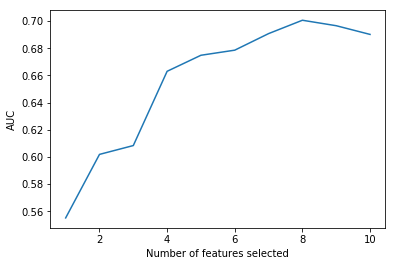

In [7]:
model=RFECV(reg,step=1,cv=2,scoring='roc_auc',n_jobs=-1,verbose=1)
model.fit(X,y)
# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("AUC")
plt.plot(range(1, len(model.grid_scores_) + 1), model.grid_scores_)
plt.show()

In [8]:
pd.DataFrame(X.columns,columns=['Features'])[model.support_]

,Features
1,age
2,NumberOfTime30-59DaysPastDueNotWorse
3,DebtRatio
5,NumberOfOpenCreditLinesAndLoans
6,NumberOfTimes90DaysLate
7,NumberRealEstateLoansOrLines
8,NumberOfTime60-89DaysPastDueNotWorse
9,NumberOfDependents


In [9]:
print("Optimal number of features :", model.n_features_)
print("Optimal AUC score : ", model.grid_scores_[model.n_features_])
print('Acuracy: '+ str(accuracy_score(y, model.predict(X))))
print('precision_score ', precision_score(y, model.predict(X)))
print('recall_score    ', recall_score(y, model.predict(X)))
print('f1_score    ', f1_score(y, model.predict(X)))
print('F_beta_score    ', fbeta_score(y, model.predict(X),beta=10))

Optimal number of features : 8
Optimal AUC score :  0.6965286405497385
Acuracy: 0.93332152504096
precision_score  0.5798165137614679
recall_score     0.04149159663865546
f1_score     0.07744149001347875
F_beta_score     0.041876545801651906
